In [5]:
import pandas as pd
import numpy as np

In [6]:
csvpath = ("Resources/Movie-Data/Attributes_DataFrame.csv") 

In [7]:
movies_df = pd.read_csv(csvpath, encoding="utf-8")

columns_list = ['International', 'Domestic']

#Create Sum of Domestic and International

movies_df['(International+Domestic)'] = movies_df[columns_list].sum(axis=1)


#Create Base Genre Column

Base_Genre = movies_df['Genres'].str.split(";", n = 1, expand=True)

#Drop Null Values
#movies_df = movies_df.dropna()

#Create New Smash or Bomb Column using if statement

conditions = [movies_df['Budget'] > movies_df['(International+Domestic)'],
             movies_df['Budget'] < movies_df['(International+Domestic)']]

#Define Choices
              
choices = ['Bomb','Success']

#Create New Column in dataframe

movies_df['Revenue Result?'] = np.select(conditions, choices)

movies_df['Base Genre']=Base_Genre[0]

#movies_df = movies_df.groupby(["Genres"]).agg({"Domestic" : 'sum', "International" :'sum'}).sort_values(by=["International", "Domestic", "Budget"], ascending = False).reset_index().head(10)

#movies_df.groupby('Genres').head(10)

movies_df.head(-1)

,Title,Domestic,International,Budget,Distributor,MPAA-Rating,Runtime,Genres,(International+Domestic),Revenue Result?,Base Genre
0,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi,1670400637,Success,Action
1,Star Wars: Episode VII - The Force Awakens (2015),936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Action;Adventure;Sci-Fi,2068223624,Success,Action
2,Avengers: Age of Ultron (2015),459005868,943800000,250000000.0,Walt Disney Studios Motion Pictures,PG-13,141,Action;Adventure;Sci-Fi,1402805868,Success,Action
3,Inside Out (2015),356461711,501149463,175000000.0,Walt Disney Studios Motion Pictures,PG,95,Adventure;Animation;Comedy;Drama;Family;Fantasy,857611174,Success,Adventure
4,Furious 7 (2015),353007020,1162040651,190000000.0,Universal Pictures,PG-13,137,Action;Adventure;Thriller,1515047671,Success,Action
...,...,...,...,...,...,...,...,...,...,...,...
3394,National Theater Live: Cyrano de Bergerac (2020),198352,1164860,NaN,Fathom Events,NaN,160,Drama;Romance,1363212,0,Drama
3395,The Wolf of Snow Hollow (2020),185026,81937,NaN,United Artists Releasing,R,83,Comedy;Horror;Thriller,266963,0,Comedy
3396,Come Away (2020),184477,1480982,NaN,Relativity Media,PG,94,Adventure;Drama;Fantasy,1665459,0,Adventure
3397,No Escape (2020),167962,4135870,NaN,Vertical Entertainment,R,91,Adventure;Horror;Mystery;Thriller,4303832,0,Adventure


In [8]:
#Gather top 10 Distributors and sort revenues ascending by Average

movies_df[['Distributor', '(International+Domestic)']].groupby(['Distributor']).mean({'(International+Domestic)'}).sort_values('(International+Domestic)', ascending=False).head(10)




,(International+Domestic)
Distributor,
The H Collective,8.703254e+08
Well Go USA Entertainment,7.260635e+08
CMC Pictures,5.371095e+08
DreamWorks,3.154536e+08
Walt Disney Studios Motion Pictures,3.026314e+08
Twentieth Century Fox,1.937225e+08
Sony Pictures Entertainment (SPE),1.935444e+08
Warner Bros.,1.865259e+08
Universal Pictures,1.728260e+08


<AxesSubplot:title={'center':'Distributor vs. Average Revenue (1999-2020)'}, xlabel='Distributor', ylabel='Revenue In Millions'>

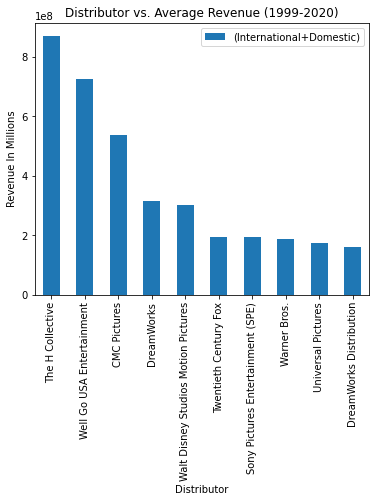

In [9]:
#Rename Dataframes (groupby_genres from movies_df) and Sort
groupby_dist = movies_df[['Distributor', '(International+Domestic)']].groupby(['Distributor']).mean({'(International+Domestic)'}).sort_values('(International+Domestic)', ascending=False).head(10)

groupby_dist.plot(kind='bar', title='Distributor vs. Average Revenue (1999-2020)', ylabel='Revenue In Millions', xlabel='Distributor', figsize=(6,5))